In [18]:
import os
import numpy as np
import pandas as pd
from scipy import signal
from datetime import datetime, timedelta
import argparse
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
df = pd.read_csv("weight.csv", header=None)
df.dropna(inplace=True)
# Rename columns
df.columns = ["Q"]
df["Q"] = df["Q"].astype(int)
df["Index"] = range(len(df))

sampled_data_raw = df["Q"]

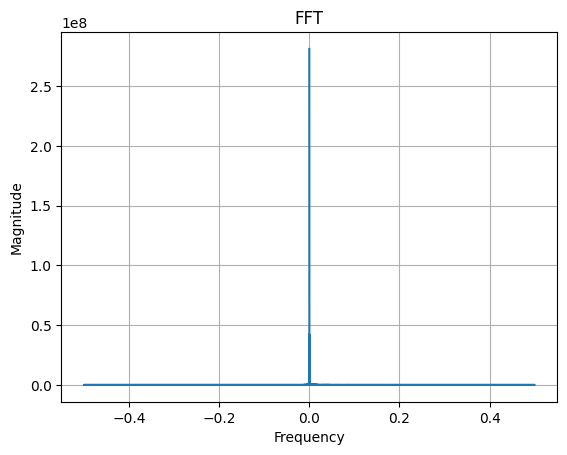

In [20]:
# Perform FFT
fft = np.fft.fft(sampled_data_raw, len(sampled_data_raw))
freq = np.fft.fftfreq(len(sampled_data_raw))
plt.figure()
plt.plot(freq, np.abs(fft))
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('FFT')
plt.grid(True)

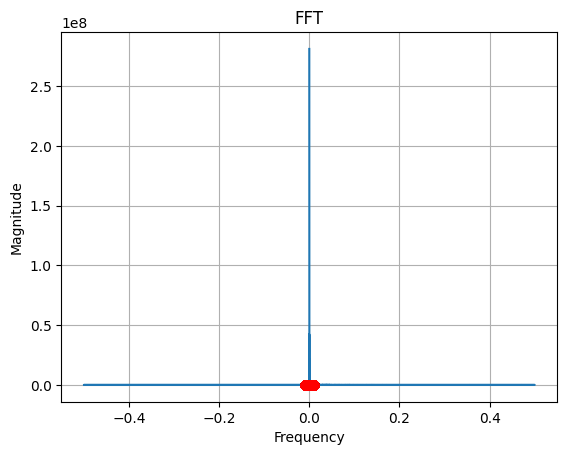

In [38]:
#quantiles
freq_quantiles = np.quantile(freq, [0.49, 0.5, 0.51])
fft_quantiles = np.quantile(np.abs(fft), [0.49, 0.5, 0.51])
freq_most_significant = [f for f in freq if f >= freq_quantiles[0] and f <= freq_quantiles[2]]
fft_most_significant = [f for f in np.abs(fft) if f >= fft_quantiles[0] and f <= fft_quantiles[2]]
plt.figure()
plt.plot(freq, np.abs(fft))
plt.plot(freq_most_significant, fft_most_significant, 'ro')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('FFT')
plt.grid(True)